In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

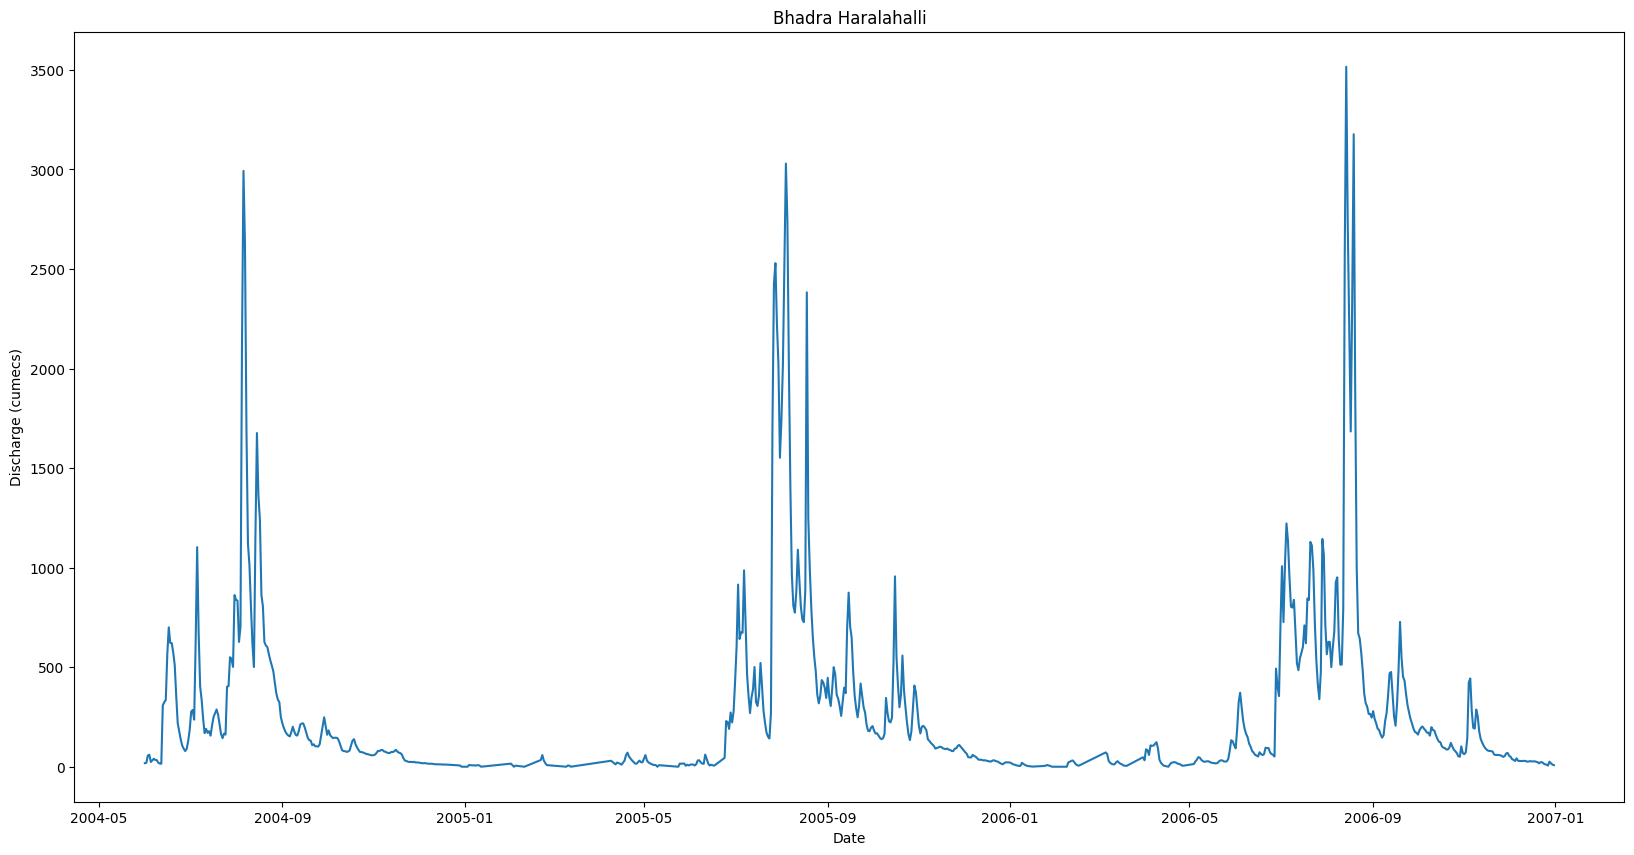

In [38]:
# Read data from csv file, data has 2 columns: Date and Discharge(cumsecs)
# Date is in dd/mm/yyyy format or dd-mm-yyyy format
# Some data values are missing or zero, use linear interpolation to fill them
df = pd.read_csv('./data/cleaned_data.csv', header=0, names=['Date', 'Discharge'])
# remove commas from discharge values and convert them to float
df['Discharge'] = df['Discharge'].str.replace(',', '').str.replace('"', '').astype(float)
# df['Discharge'] = df['Discharge'].replace(0, np.nan).interpolate(method='linear')
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.set_index('Date')

# take values from June 2004 to December 2006
df = df.loc['2004-06-01':'2006-12-31']

# plot the data
plt.figure(figsize=(20, 10))
plt.plot(df['Discharge'])
plt.xlabel('Date')
plt.ylabel('Discharge (cumecs)')
plt.title('Bhadra Haralahalli')
plt.show()



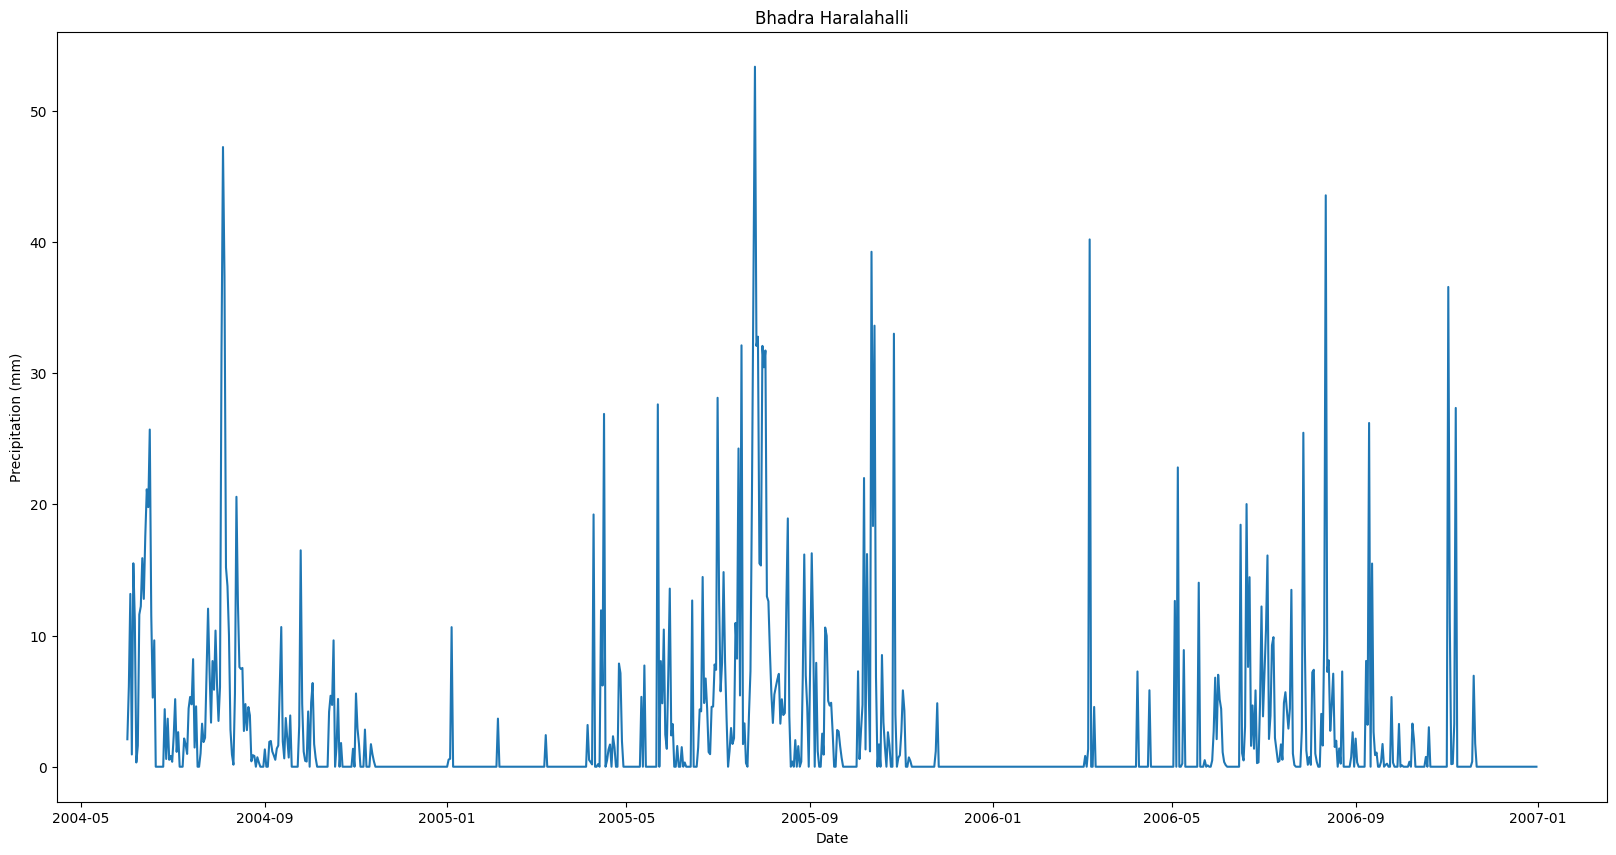

In [43]:
# Read data from csv file, data has 2 columns: Date and Precipitation(mm)
# Date is in yyyy-mm-dd format
precipitation_df = pd.read_csv('./data/precipitation_bhadra.csv', header=0, names=['Date', 'Precipitation'])
precipitation_df['Date'] = pd.to_datetime(precipitation_df['Date'], format='%Y-%m-%d')
precipitation_df = precipitation_df.set_index('Date')

# take values from June 2004 to December 2006
precipitation_df = precipitation_df.loc['2004-06-01':'2006-12-31']

# plot the data
plt.figure(figsize=(20, 10))
plt.plot(precipitation_df['Precipitation'])
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Bhadra Haralahalli')
plt.show()

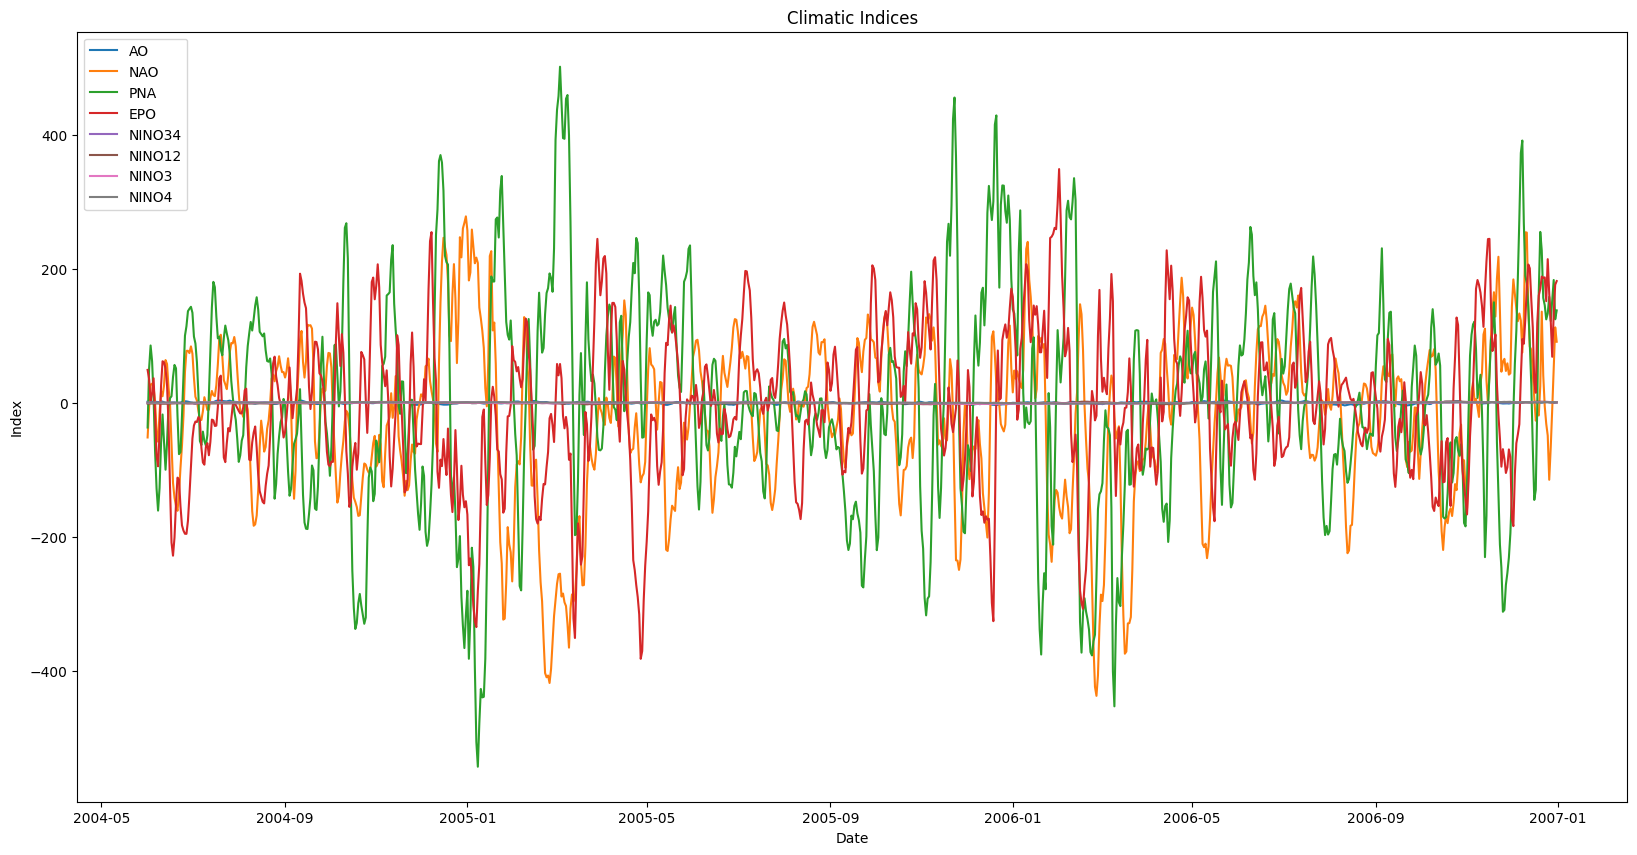

In [45]:
# read data from data.csv which has following columns - Date,AO,NAO,PNA,EPO,NINO34,NINO12,NINO3,NINO4
# Date is in yyyy-mm-dd format
climatic_df = pd.read_csv('./data/data.csv', header=0, names=['Date', 'AO', 'NAO', 'PNA', 'EPO', 'NINO34', 'NINO12', 'NINO3', 'NINO4'], parse_dates=['Date'])
climatic_df['Date'] = pd.to_datetime(climatic_df['Date'], format='%Y-%m-%d')
climatic_df = climatic_df.set_index('Date')

# take values from June 2004 to December 2006
climatic_df = climatic_df.loc['2004-06-01':'2006-12-31']

# plot the data
plt.figure(figsize=(20, 10))
plt.plot(climatic_df['AO'], label='AO')
plt.plot(climatic_df['NAO'], label='NAO')
plt.plot(climatic_df['PNA'], label='PNA')
plt.plot(climatic_df['EPO'], label='EPO')
plt.plot(climatic_df['NINO34'], label='NINO34')
plt.plot(climatic_df['NINO12'], label='NINO12')
plt.plot(climatic_df['NINO3'], label='NINO3')
plt.plot(climatic_df['NINO4'], label='NINO4')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Climatic Indices')
plt.show()

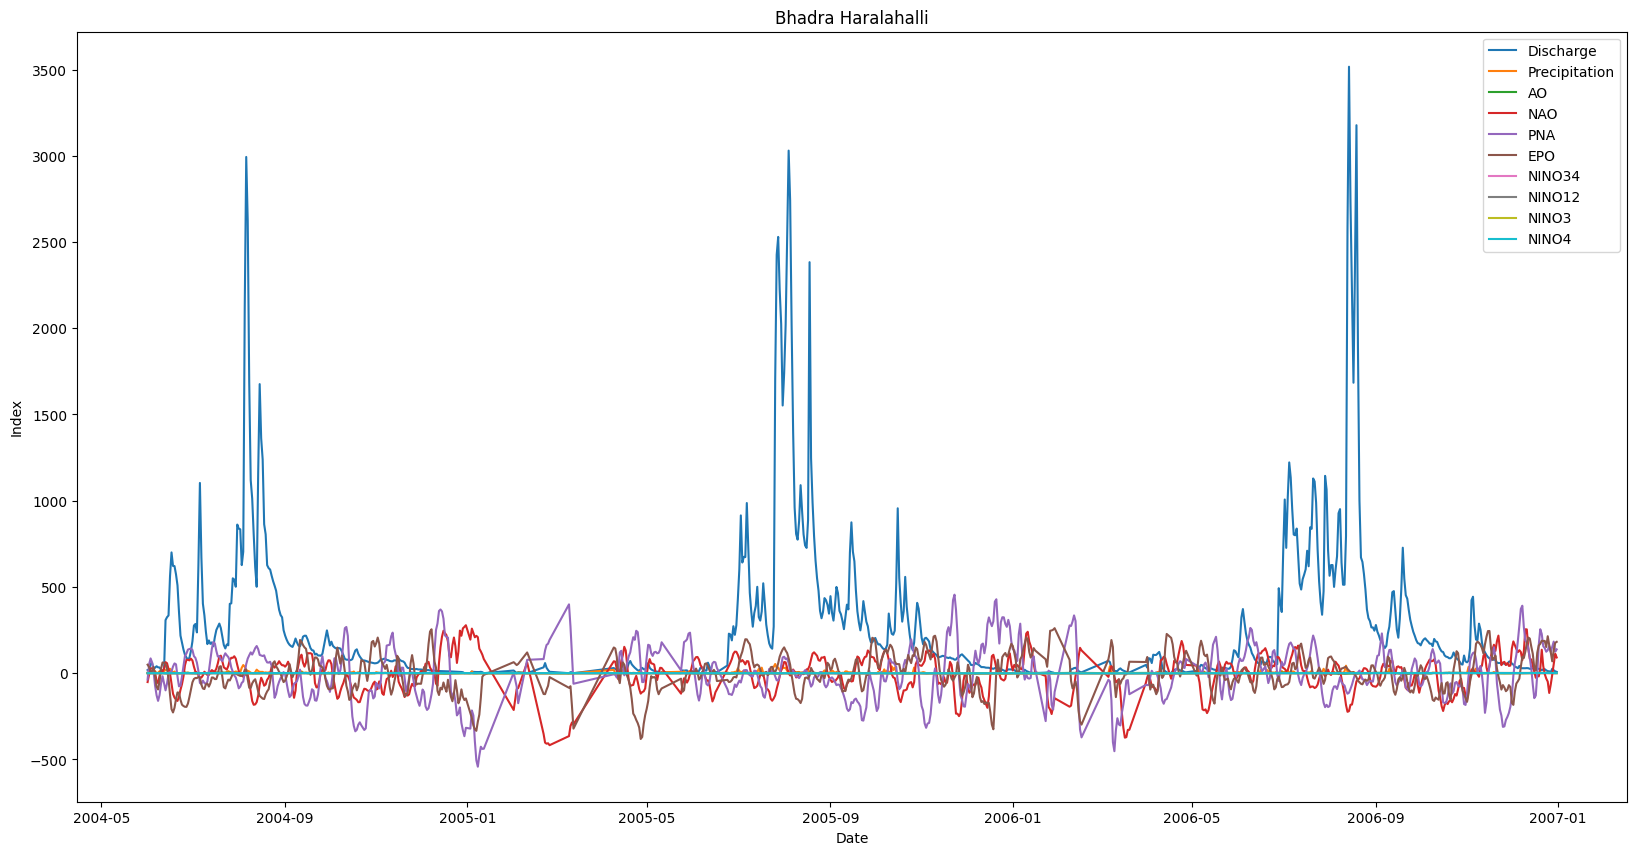

In [46]:
# merge discharge, precipitation and climatic data
df = pd.merge(df, climatic_df, how='inner', left_index=True, right_index=True)
df = pd.merge(df, precipitation_df, how='inner', left_index=True, right_index=True)

# plot the data
plt.figure(figsize=(20, 10))
plt.plot(df['Discharge'], label='Discharge')
plt.plot(df['Precipitation'], label='Precipitation')
plt.plot(df['AO'], label='AO')
plt.plot(df['NAO'], label='NAO')
plt.plot(df['PNA'], label='PNA')
plt.plot(df['EPO'], label='EPO')
plt.plot(df['NINO34'], label='NINO34')
plt.plot(df['NINO12'], label='NINO12')
plt.plot(df['NINO3'], label='NINO3')
plt.plot(df['NINO4'], label='NINO4')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Index')
plt.title('Bhadra Haralahalli')
plt.show()

In [47]:
# Code for extracting important features

# Specify the threshold for feature importance
feature_importance_threshold = 0.01

# Function to perform feature extraction using Random Forest
def perform_feature_extraction(data, target_column):
    # Split the data into features and target
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize the Random Forest regressor
    rf_regressor = RandomForestRegressor()

    # Train the Random Forest model
    rf_regressor.fit(X_train, y_train)

    # Get feature importance scores
    feature_importances = rf_regressor.feature_importances_

    # Create a DataFrame with feature names and their importance scores
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

    # Select features above the threshold
    selected_features = feature_importance_df[feature_importance_df['Importance'] >= feature_importance_threshold]['Feature']

    # Display selected features
    print("Selected Features:")
    print(selected_features)

    return selected_features

# Example usage for Bhadra reservoir
bhadra_selected_features = perform_feature_extraction(df, 'Discharge')

Selected Features:
0               AO
1              NAO
2              PNA
3              EPO
4           NINO34
5           NINO12
6            NINO3
7            NINO4
8    Precipitation
Name: Feature, dtype: object
